In [ ]:
import tensorflow as tf
from sklearn.datasets import make_moons

In [ ]:
X = make_moons()

In [ ]:
X

(array([[ 7.77479066e-01, -4.74927912e-01],
        [-2.22520934e-01,  9.74927912e-01],
        [-9.97945393e-01,  6.40702200e-02],
        [ 1.40478334e+00, -4.14412623e-01],
        [ 1.28681296e-01,  9.28244800e-03],
        [ 1.34536505e+00, -4.38468422e-01],
        [ 3.45365054e-01,  9.38468422e-01],
        [-7.18349350e-01,  6.95682551e-01],
        [ 8.20998618e-03,  3.72122838e-01],
        [ 1.96729486e+00,  2.46345416e-01],
        [ 2.84527587e-01,  9.58667853e-01],
        [ 1.15959990e+00, -4.87181783e-01],
        [ 9.67948422e-01, -4.99486216e-01],
        [ 1.62348980e+00, -2.81831482e-01],
        [ 9.03976974e-01, -4.95379113e-01],
        [ 1.67230089e+00, -2.40277997e-01],
        [ 5.18392568e-01,  8.55142763e-01],
        [ 1.87131870e+00,  9.28244800e-03],
        [ 1.76144596e+00, -1.48228395e-01],
        [ 8.40400105e-01, -4.87181783e-01],
        [ 1.51839257e+00, -3.55142763e-01],
        [ 6.72300890e-01,  7.40277997e-01],
        [ 5.37461710e-01, -3.865

In [ ]:
y = X[1]

In [ ]:
x = X[0]
x

array([[ 7.77479066e-01, -4.74927912e-01],
       [-2.22520934e-01,  9.74927912e-01],
       [-9.97945393e-01,  6.40702200e-02],
       [ 1.40478334e+00, -4.14412623e-01],
       [ 1.28681296e-01,  9.28244800e-03],
       [ 1.34536505e+00, -4.38468422e-01],
       [ 3.45365054e-01,  9.38468422e-01],
       [-7.18349350e-01,  6.95682551e-01],
       [ 8.20998618e-03,  3.72122838e-01],
       [ 1.96729486e+00,  2.46345416e-01],
       [ 2.84527587e-01,  9.58667853e-01],
       [ 1.15959990e+00, -4.87181783e-01],
       [ 9.67948422e-01, -4.99486216e-01],
       [ 1.62348980e+00, -2.81831482e-01],
       [ 9.03976974e-01, -4.95379113e-01],
       [ 1.67230089e+00, -2.40277997e-01],
       [ 5.18392568e-01,  8.55142763e-01],
       [ 1.87131870e+00,  9.28244800e-03],
       [ 1.76144596e+00, -1.48228395e-01],
       [ 8.40400105e-01, -4.87181783e-01],
       [ 1.51839257e+00, -3.55142763e-01],
       [ 6.72300890e-01,  7.40277997e-01],
       [ 5.37461710e-01, -3.86599306e-01],
       [ 3.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
3/3 [==============================] - 4s 26ms/step - loss: 0.7761 - accuracy: 0.2750
Epoch 2/5
3/3 [==============================] - 0s 9ms/step - loss: 0.7727 - accuracy: 0.2750
Epoch 3/5
3/3 [==============================] - 0s 8ms/step - loss: 0.7690 - accuracy: 0.2750
Epoch 4/5
3/3 [==============================] - 0s 7ms/step - loss: 0.7656 - accuracy: 0.3000
Epoch 5/5
3/3 [==============================] - 0s 8ms/step - loss: 0.7620 - accuracy: 0.3125


In [ ]:
len(x)

100

In [ ]:
# Computer vision

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-03-13 09:06:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 142.250.107.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   127MB/s    in 0.8s    

2024-03-13 09:06:05 (127 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile
import os
zipref = zipfile.ZipFile("pizza_steak.zip")
zipref.extractall()
zipref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory('pizza_steak/train/',
                                   batch_size = 32,
                                  target_size=(224,224),
                                   class_mode='binary',
                                   seed=42)
test_datag = test_datagen.flow_from_directory('pizza_steak/test/',
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode='binary',
                                  seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D((2,2), strides=1),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), strides=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 221, 221, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 219, 219, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 218, 218, 32)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1520768)           0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(train_data, epochs=5)

Epoch 1/5
47/47 [==============================] - 14s 147ms/step - loss: 1.3678 - accuracy: 0.5487
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5283 - accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3915 - accuracy: 0.8407
Epoch 4/5
47/47 [==============================] - 5s 102ms/step - loss: 0.2124 - accuracy: 0.9253
Epoch 5/5
47/47 [==============================] - 5s 97ms/step - loss: 0.0909 - accuracy: 0.9733


In [ ]:
model.predict(test_datag)

16/16 [==============================] - 3s 156ms/step


array([[9.53597665e-01],
       [3.25071722e-01],
       [9.99958515e-01],
       [3.42324972e-01],
       [2.01315224e-01],
       [9.99999166e-01],
       [9.98839915e-01],
       [3.75935853e-01],
       [9.54629898e-01],
       [9.99636889e-01],
       [2.47475080e-04],
       [2.14876354e-01],
       [3.87118429e-01],
       [8.11033249e-02],
       [9.99883652e-01],
       [9.99999404e-01],
       [9.37818468e-01],
       [4.25231941e-02],
       [9.83121514e-01],
       [9.97351885e-01],
       [7.59272993e-01],
       [2.85453558e-01],
       [4.64107007e-01],
       [9.92319047e-01],
       [3.27575713e-01],
       [9.16045487e-01],
       [9.77238655e-01],
       [2.38656588e-02],
       [4.81380994e-04],
       [9.99907613e-01],
       [9.99999046e-01],
       [7.40152061e-01],
       [9.97853041e-01],
       [5.85591595e-04],
       [2.31680255e-02],
       [9.89472330e-01],
       [3.74311626e-01],
       [8.55289459e-01],
       [1.70563627e-02],
       [3.17979567e-02],


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.6,
                                   shear_range = 0.7,
                                   zoom_range=0.5,
                                   horizontal_flip = True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_data_augmented = train_datagen_augmented.flow_from_directory('pizza_steak/train/',
                                   batch_size = 32,
                                  target_size=(224,224),
                                   class_mode='binary',
                                   seed=42)
train_data = train_datagen.flow_from_directory("pizza_steak/train/",
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            seed=42)
test_data = test_datagen.flow_from_directory('pizza_steak/test/',
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode='binary',
                                  seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
img, label = train_data.next()
img_augmented, label_augmented = train_data_augmented.next()

In [ ]:
img[0], img_augmented[0]

(array([[[0.42352945, 0.43137258, 0.34509805],
         [0.3137255 , 0.32941177, 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34509805, 0.3803922 ],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],
 
        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.38431376],
         [0.39607847, 0.34901962, 0.3647059 ]],
 
        [[0.3647059 , 0.40000004, 0.29411766],
         [0.38823533, 0.42352945, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.30980393],
         [0.30980393, 0.29803923, 0.2784314 ],
         [0.3372549 , 0.3254902 , 0.30588236]],
 
        ...,
 
        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509

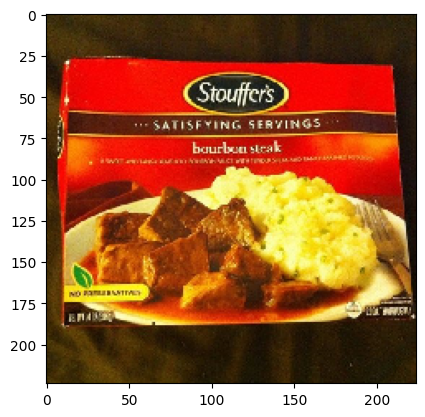

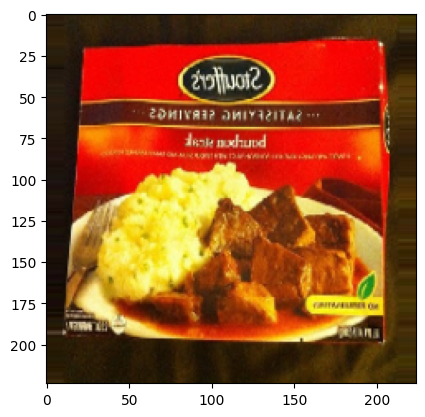

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[15])
plt.show()
plt.imshow(img_augmented[15])
plt.show()